<a href="https://colab.research.google.com/github/EvgenyBelov78/DA1/blob/main/ML_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import datetime

In [36]:
#import urllib.request
url = "http://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=02/03/2001&date_req2=04/10/2022&VAL_NM_RQ=R01235"

In [89]:
df = pd.read_xml(url)

In [90]:
df.tail()

,Date,Id,Nominal,Value
5348,28.09.2022,R01235,1,"58,1756"
5349,29.09.2022,R01235,1,"58,4485"
5350,30.09.2022,R01235,1,"57,4130"
5351,01.10.2022,R01235,1,"55,2987"
5352,04.10.2022,R01235,1,"57,5664"


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     5353 non-null   object
 1   Id       5353 non-null   object
 2   Nominal  5353 non-null   int64 
 3   Value    5353 non-null   object
dtypes: int64(1), object(3)
memory usage: 167.4+ KB


In [92]:
df['Date'] = pd.to_datetime(df['Date']).dt.date.astype('datetime64[ns]')

In [93]:
df.drop ('Id',axis=1,inplace=True)

In [94]:
df.drop ('Nominal',axis=1,inplace=True)

In [95]:
df['Value']=df['Value'].str.replace(',','.')

In [96]:
df.head()

,Date,Value
0,2001-02-03,28.6200
1,2001-03-03,28.6500
2,2001-06-03,28.6600
3,2001-07-03,28.6300
4,2001-08-03,28.6200


In [97]:
df['Value'] = df['Value'].apply(pd.to_numeric, downcast='float')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5353 non-null   datetime64[ns]
 1   Value   5353 non-null   float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 62.9 KB


In [99]:
df = df.reset_index(drop=True)

In [100]:
df.tail()

,Date,Value
5348,2022-09-28,58.175598
5349,2022-09-29,58.448502
5350,2022-09-30,57.412998
5351,2022-01-10,55.298698
5352,2022-04-10,57.566399


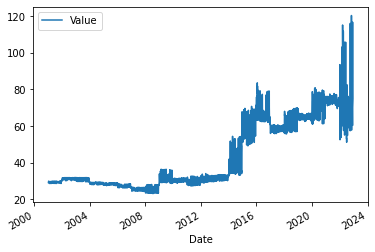

In [101]:
import matplotlib.pyplot as plt

df.set_index('Date').plot()

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
df.set_index('Date', inplace = True)

In [104]:
df

,Value
Date,
2001-02-03,28.620001
2001-03-03,28.650000
2001-06-03,28.660000
2001-07-03,28.629999
2001-08-03,28.620001
...,...
2022-09-28,58.175598
2022-09-29,58.448502
2022-09-30,57.412998


In [106]:
# функция по созданию сгенерированных признаков
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['is_weekend'] = data.index.isin([5,6])*1
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['Value'].shift(lag)

    data['y_mean'] = data['Value'].shift().rolling(rolling_mean_size).mean().copy()

In [107]:
make_features(df,30,3)

In [108]:
df

,Value,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,...,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,y_mean
Date,,,,,,,,,,,,,,,,,,,,,
2001-02-03,28.620001,2001,2,3,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-03,28.650000,2001,3,3,5,0,28.620001,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-06-03,28.660000,2001,6,3,6,0,28.650000,28.620001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-03,28.629999,2001,7,3,1,0,28.660000,28.650000,28.620001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.643333
2001-08-03,28.620001,2001,8,3,4,0,28.629999,28.660000,28.650000,28.620001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.646666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28,58.175598,2022,9,28,2,0,57.999001,58.100601,59.831799,60.868500,...,60.092400,59.769901,59.997398,59.896301,59.741901,59.132099,59.957001,60.755199,61.424702,58.643800
2022-09-29,58.448502,2022,9,29,3,0,58.175598,57.999001,58.100601,59.831799,...,60.363602,60.092400,59.769901,59.997398,59.896301,59.741901,59.132099,59.957001,60.755199,58.091733
2022-09-30,57.412998,2022,9,30,4,0,58.448502,58.175598,57.999001,58.100601,...,60.367699,60.363602,60.092400,59.769901,59.997398,59.896301,59.741901,59.132099,59.957001,58.207700


In [109]:
df.dropna(inplace = True)

In [110]:
df

,Value,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,...,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,y_mean
Date,,,,,,,,,,,,,,,,,,,,,
2001-04-14,28.820000,2001,4,14,5,0,28.860001,28.870001,28.790001,28.840000,...,28.660000,28.650000,28.670000,28.620001,28.620001,28.629999,28.660000,28.650000,28.620001,28.840001
2001-04-17,28.850000,2001,4,17,1,0,28.820000,28.860001,28.870001,28.790001,...,28.660000,28.660000,28.650000,28.670000,28.620001,28.620001,28.629999,28.660000,28.650000,28.850000
2001-04-18,28.860001,2001,4,18,2,0,28.850000,28.820000,28.860001,28.870001,...,28.660000,28.660000,28.660000,28.650000,28.670000,28.620001,28.620001,28.629999,28.660000,28.843334
2001-04-19,28.870001,2001,4,19,3,0,28.860001,28.850000,28.820000,28.860001,...,28.650000,28.660000,28.660000,28.660000,28.650000,28.670000,28.620001,28.620001,28.629999,28.843334
2001-04-20,28.900000,2001,4,20,4,0,28.870001,28.860001,28.850000,28.820000,...,28.620001,28.650000,28.660000,28.660000,28.660000,28.650000,28.670000,28.620001,28.620001,28.860001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28,58.175598,2022,9,28,2,0,57.999001,58.100601,59.831799,60.868500,...,60.092400,59.769901,59.997398,59.896301,59.741901,59.132099,59.957001,60.755199,61.424702,58.643800
2022-09-29,58.448502,2022,9,29,3,0,58.175598,57.999001,58.100601,59.831799,...,60.363602,60.092400,59.769901,59.997398,59.896301,59.741901,59.132099,59.957001,60.755199,58.091733
2022-09-30,57.412998,2022,9,30,4,0,58.448502,58.175598,57.999001,58.100601,...,60.367699,60.363602,60.092400,59.769901,59.997398,59.896301,59.741901,59.132099,59.957001,58.207700


In [111]:
X_train,X_test, y_train, y_test = train_test_split(df.drop('Value',axis=1),
                                                  df.Value,
                                                  shuffle = False,
                                                  test_size = 0.20)

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
lr = LinearRegression()

In [114]:
lr.fit(X_train, y_train)

LinearRegression()

In [115]:
from sklearn.metrics import mean_absolute_error

In [116]:
print('Ошибка на Train',round(mean_absolute_error(y_train, lr.predict(X_train)),2))

Ошибка на Train 0.2


In [117]:
print('Ошибка на Test',round(mean_absolute_error(y_test, lr.predict(X_test)),2))

Ошибка на Test 0.56


## Предсказываем на 5 октября

In [118]:
df_new = pd.DataFrame(df['Value']).reset_index().copy()

In [119]:
df_new

,Date,Value
0,2001-04-14,28.820000
1,2001-04-17,28.850000
2,2001-04-18,28.860001
3,2001-04-19,28.870001
4,2001-04-20,28.900000
...,...,...
5318,2022-09-28,58.175598
5319,2022-09-29,58.448502
5320,2022-09-30,57.412998
5321,2022-01-10,55.298698


In [126]:
df_concat = df_new.tail(1).copy()

In [127]:
df_concat.reset_index( inplace = True , drop=True)

In [130]:
df_concat

,Date,Value
0,2022-10-05,57.566399


In [129]:
df_concat['Date'] = pd.to_datetime('2022-10-05')

In [131]:
import numpy as np
df_concat['Value'] = 0

In [132]:
df_concat

,Date,Value
0,2022-10-05,0


In [133]:
df_all = pd.concat([df_new,df_concat], ignore_index=True)

### генерируем фичи для 5 октября

In [134]:
df_all.set_index('Date', inplace = True)

In [135]:
df_all.tail()

,Value
Date,
2022-09-29,58.448502
2022-09-30,57.412998
2022-01-10,55.298698
2022-04-10,57.566399
2022-10-05,0.000000


In [136]:
make_features(df_all,30,3)

In [137]:
df_all.drop('Value',axis=1).tail(1)

,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,y_mean
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-05,2022,10,5,2,0,57.566399,55.298698,57.412998,58.448502,58.175598,...,60.3713,60.237,60.238602,60.367699,60.363602,60.0924,59.769901,59.997398,59.896301,56.759365


In [138]:
lr_full = LinearRegression()

In [139]:
lr_full.fit(df.drop('Value',axis=1),df.Value)

LinearRegression()

In [140]:
print('Предсказание на 5 октября - ',lr.predict(df_all.drop('Value',axis=1).tail(1))[0])

Предсказание на 5 октября -  57.578467872121514


In [141]:
print('Предсказание на 5 октября, модель видела весь датасет - ',lr_full.predict(df_all.drop('Value',axis=1).tail(1))[0])

Предсказание на 5 октября, модель видела весь датасет -  57.705492483680466


In [142]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [143]:
gb = GradientBoostingRegressor()

In [144]:
gb.fit(df.drop('Value',axis=1),df.Value)

GradientBoostingRegressor()

In [145]:
gb.predict(df_all.drop('Value',axis=1).tail(1))[0]

57.6246286824821

58,7913 ₽  курс 5 октября